In [ ]:
pip install mtcnn
pip install deepface

In [89]:
##Loading 2 pictures
image1="image1.webp"
image2="image2.jpeg"

In [2]:
from matplotlib import pyplot
import mtcnn
from matplotlib.patches import Rectangle
import cv2
import matplotlib
import os
from PIL import Image
from deepface import DeepFace

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
path=os.getcwd()

In [32]:
def crop_images(filename,var):
  '''
  takes input a picture and location of a directory,
  returns an image with faces in the picture inside a rectangle, crop the faces, 
  and save them in the given folder

  filename: name of the picture
  var: directory where to save the cropped images
  '''

  pyplot.figure()
  data = pyplot.imread(filename)
  #display picture
  pyplot.imshow(data)
  ax = pyplot.gca()
  pixels = cv2.imread(filename)
  # MTCNN detets the faces 
  detector = mtcnn.MTCNN()
  faces = detector.detect_faces(pixels);
  tot=len(faces)
  print(f"\n\nNumber of people in picture: {tot}\n\n")
  # n is  a counter for number of people
  n=1;
  for p in range(tot):
    # read dimaenions of a pictures
    x, y, width, height = faces[p]["box"]
    # drawing rectangle around face
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    img1=pixels[y:y+height, x:x+width]
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

    # Resizing to a specific size
    img1=cv2.resize(img1,(225,225))
    # saving the cropped image
    fname=str(var)+"/person"+str(n)+".png"
    pyplot.figure(figsize=(4,3))
    pyplot.imshow(img1);
    pyplot.axis("off")
    n=n+1;
    pyplot.savefig(fname);
   
  return(faces)

  


1/1 [==============================] - 0s 169ms/step


Number of people in picture: 2




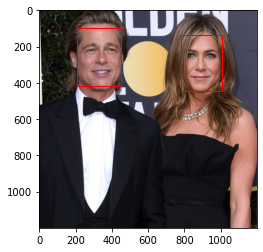

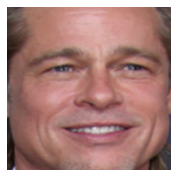

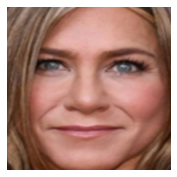

In [91]:

result=crop_images(image1,"picture1")

1/1 [==============================] - 0s 140ms/step


Number of people in picture: 1




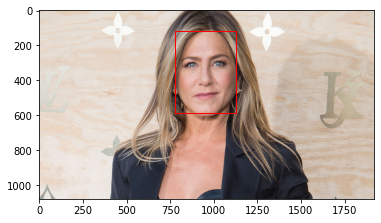

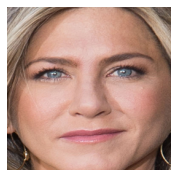

In [97]:

result1=crop_images(image2,"picture2")

In [98]:
## listing all the cropped images saved
file1=os.listdir("picture1")
file2=os.listdir("picture2")
print(f"\n Number of people in Picture 1: {len(file1)}")

print(f"\n Number of people in Picture 2: {len(file2)}")



 Number of people in Picture 1: 2

 Number of people in Picture 2: 1


In [86]:
def is_match(pic1,pic2):
  '''
  takes input two images and display them in case they are same, 
  otherwise no output
  '''
  # using deepface library to compare the images
  result = DeepFace.verify(img1_path=img1, img2_path=img2, detector_backend="ssd")
  # if they match then display picture
  if result["verified"]==True:
    print("Pair of images of some person are:\n")
    pyplot.figure()
    data=pyplot.imread(pic1)
    pyplot.imshow(data)
    pyplot.axis("off")
    pyplot.figure()
    data=pyplot.imread(pic2)
    pyplot.imshow(data)
    pyplot.axis("off")




1/1 [==============================] - 1s 621ms/step
Pair of images of some person are:

1/1 [==============================] - 1s 619ms/step


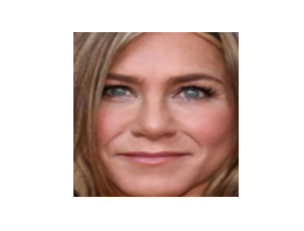

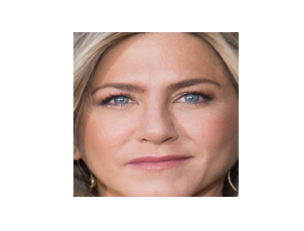

In [87]:
for i in range(len(file1)):
  for j in range(len(file2)):
    img1="/picture1/"+str(file1[i])
    img2="/picture2/"+str(file2[j])
    is_match(img1,img2)